In [1]:
#loading_all libraries
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import csv
import os

In [6]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading dataset using pd.read_csv

In [7]:
df_train=pd.read_csv("C:/Users/hitech services/Downloads/heart.csv")

In [8]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
#function for missing data
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))

In [11]:
missing_data(df_train)

,Total,Percent
target,0,0.0
thal,0,0.0
ca,0,0.0
slope,0,0.0
oldpeak,0,0.0
exang,0,0.0
thalach,0,0.0
restecg,0,0.0
fbs,0,0.0
chol,0,0.0


## Correlation Matrix

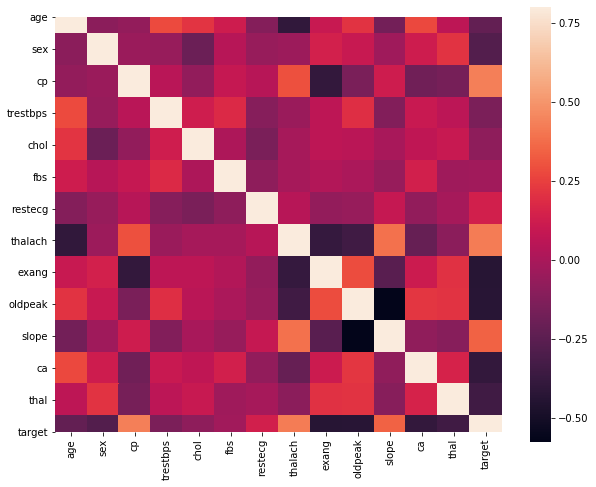

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

## Data Visulization

<Figure size 1800x1440 with 0 Axes>

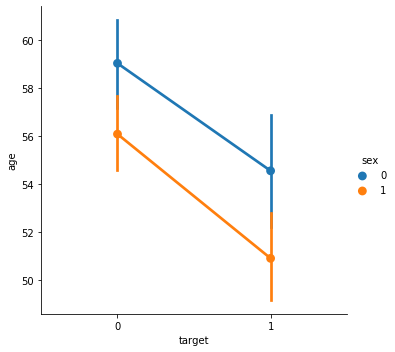

In [13]:
plt.figure(figsize=(25,20))
sns.factorplot(data=df_train,x='target',y='age',hue='sex')

<Figure size 1080x720 with 0 Axes>

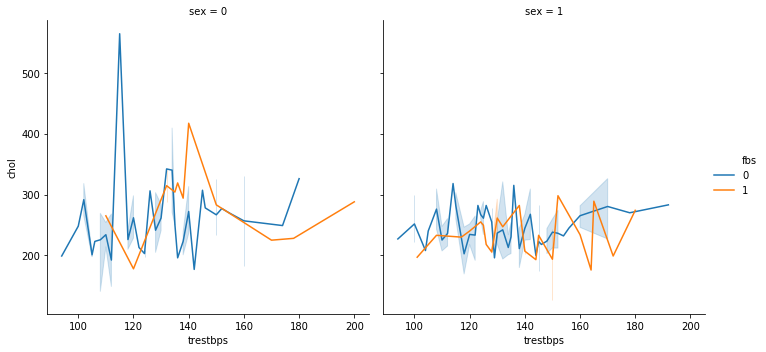

In [14]:
plt.figure(figsize=(15,10))
sns.relplot(x='trestbps', y='chol', data=df_train,
            kind='line', hue='fbs', col='sex')

Text(0.5, 1, 'boxplot')

<Figure size 1080x720 with 0 Axes>

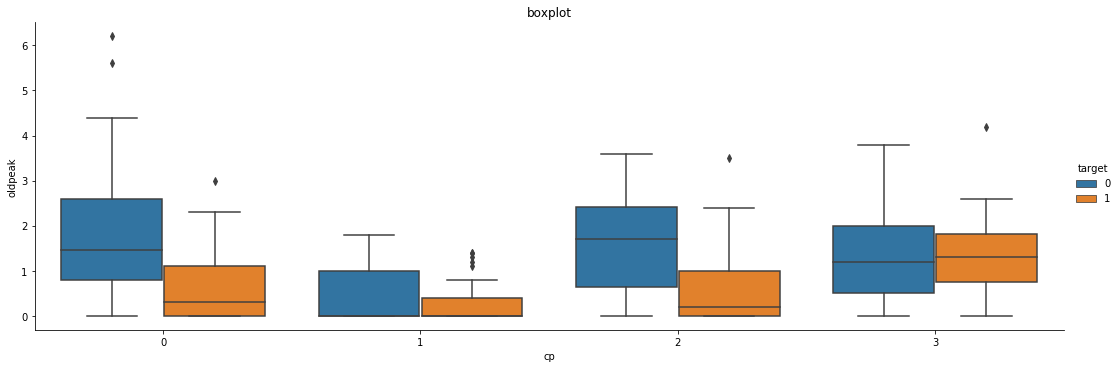

In [15]:
plt.figure(figsize=(15,10))
sns.catplot(x='cp',y='oldpeak',data=df_train,hue='target',height=5,aspect=3,kind='box')
plt.title('boxplot')

<Figure size 1080x1080 with 0 Axes>

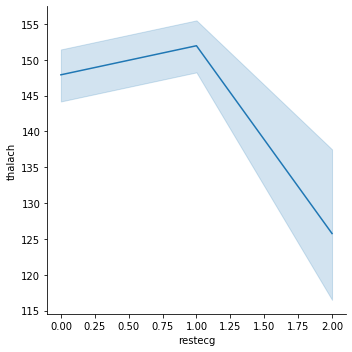

In [16]:
plt.figure(figsize=(15,15))
sns.relplot(x='restecg', y='thalach', data=df_train,
            kind='line')

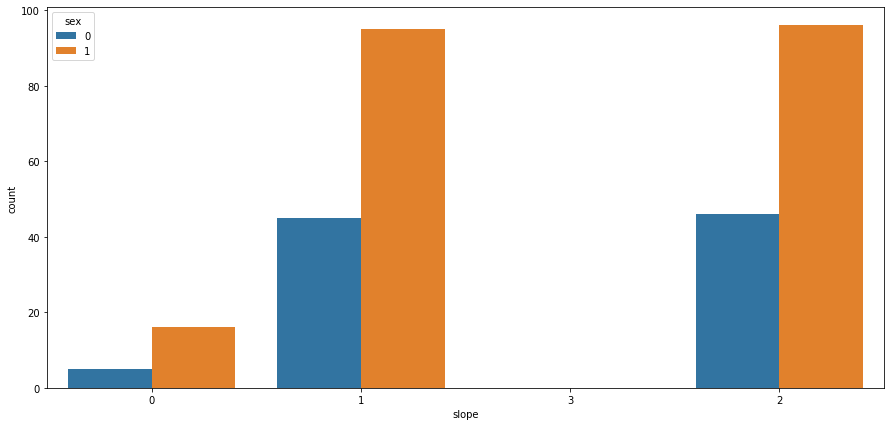

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x='slope',hue='sex',data=df_train,order=df_train['thal'].value_counts().sort_values().index);

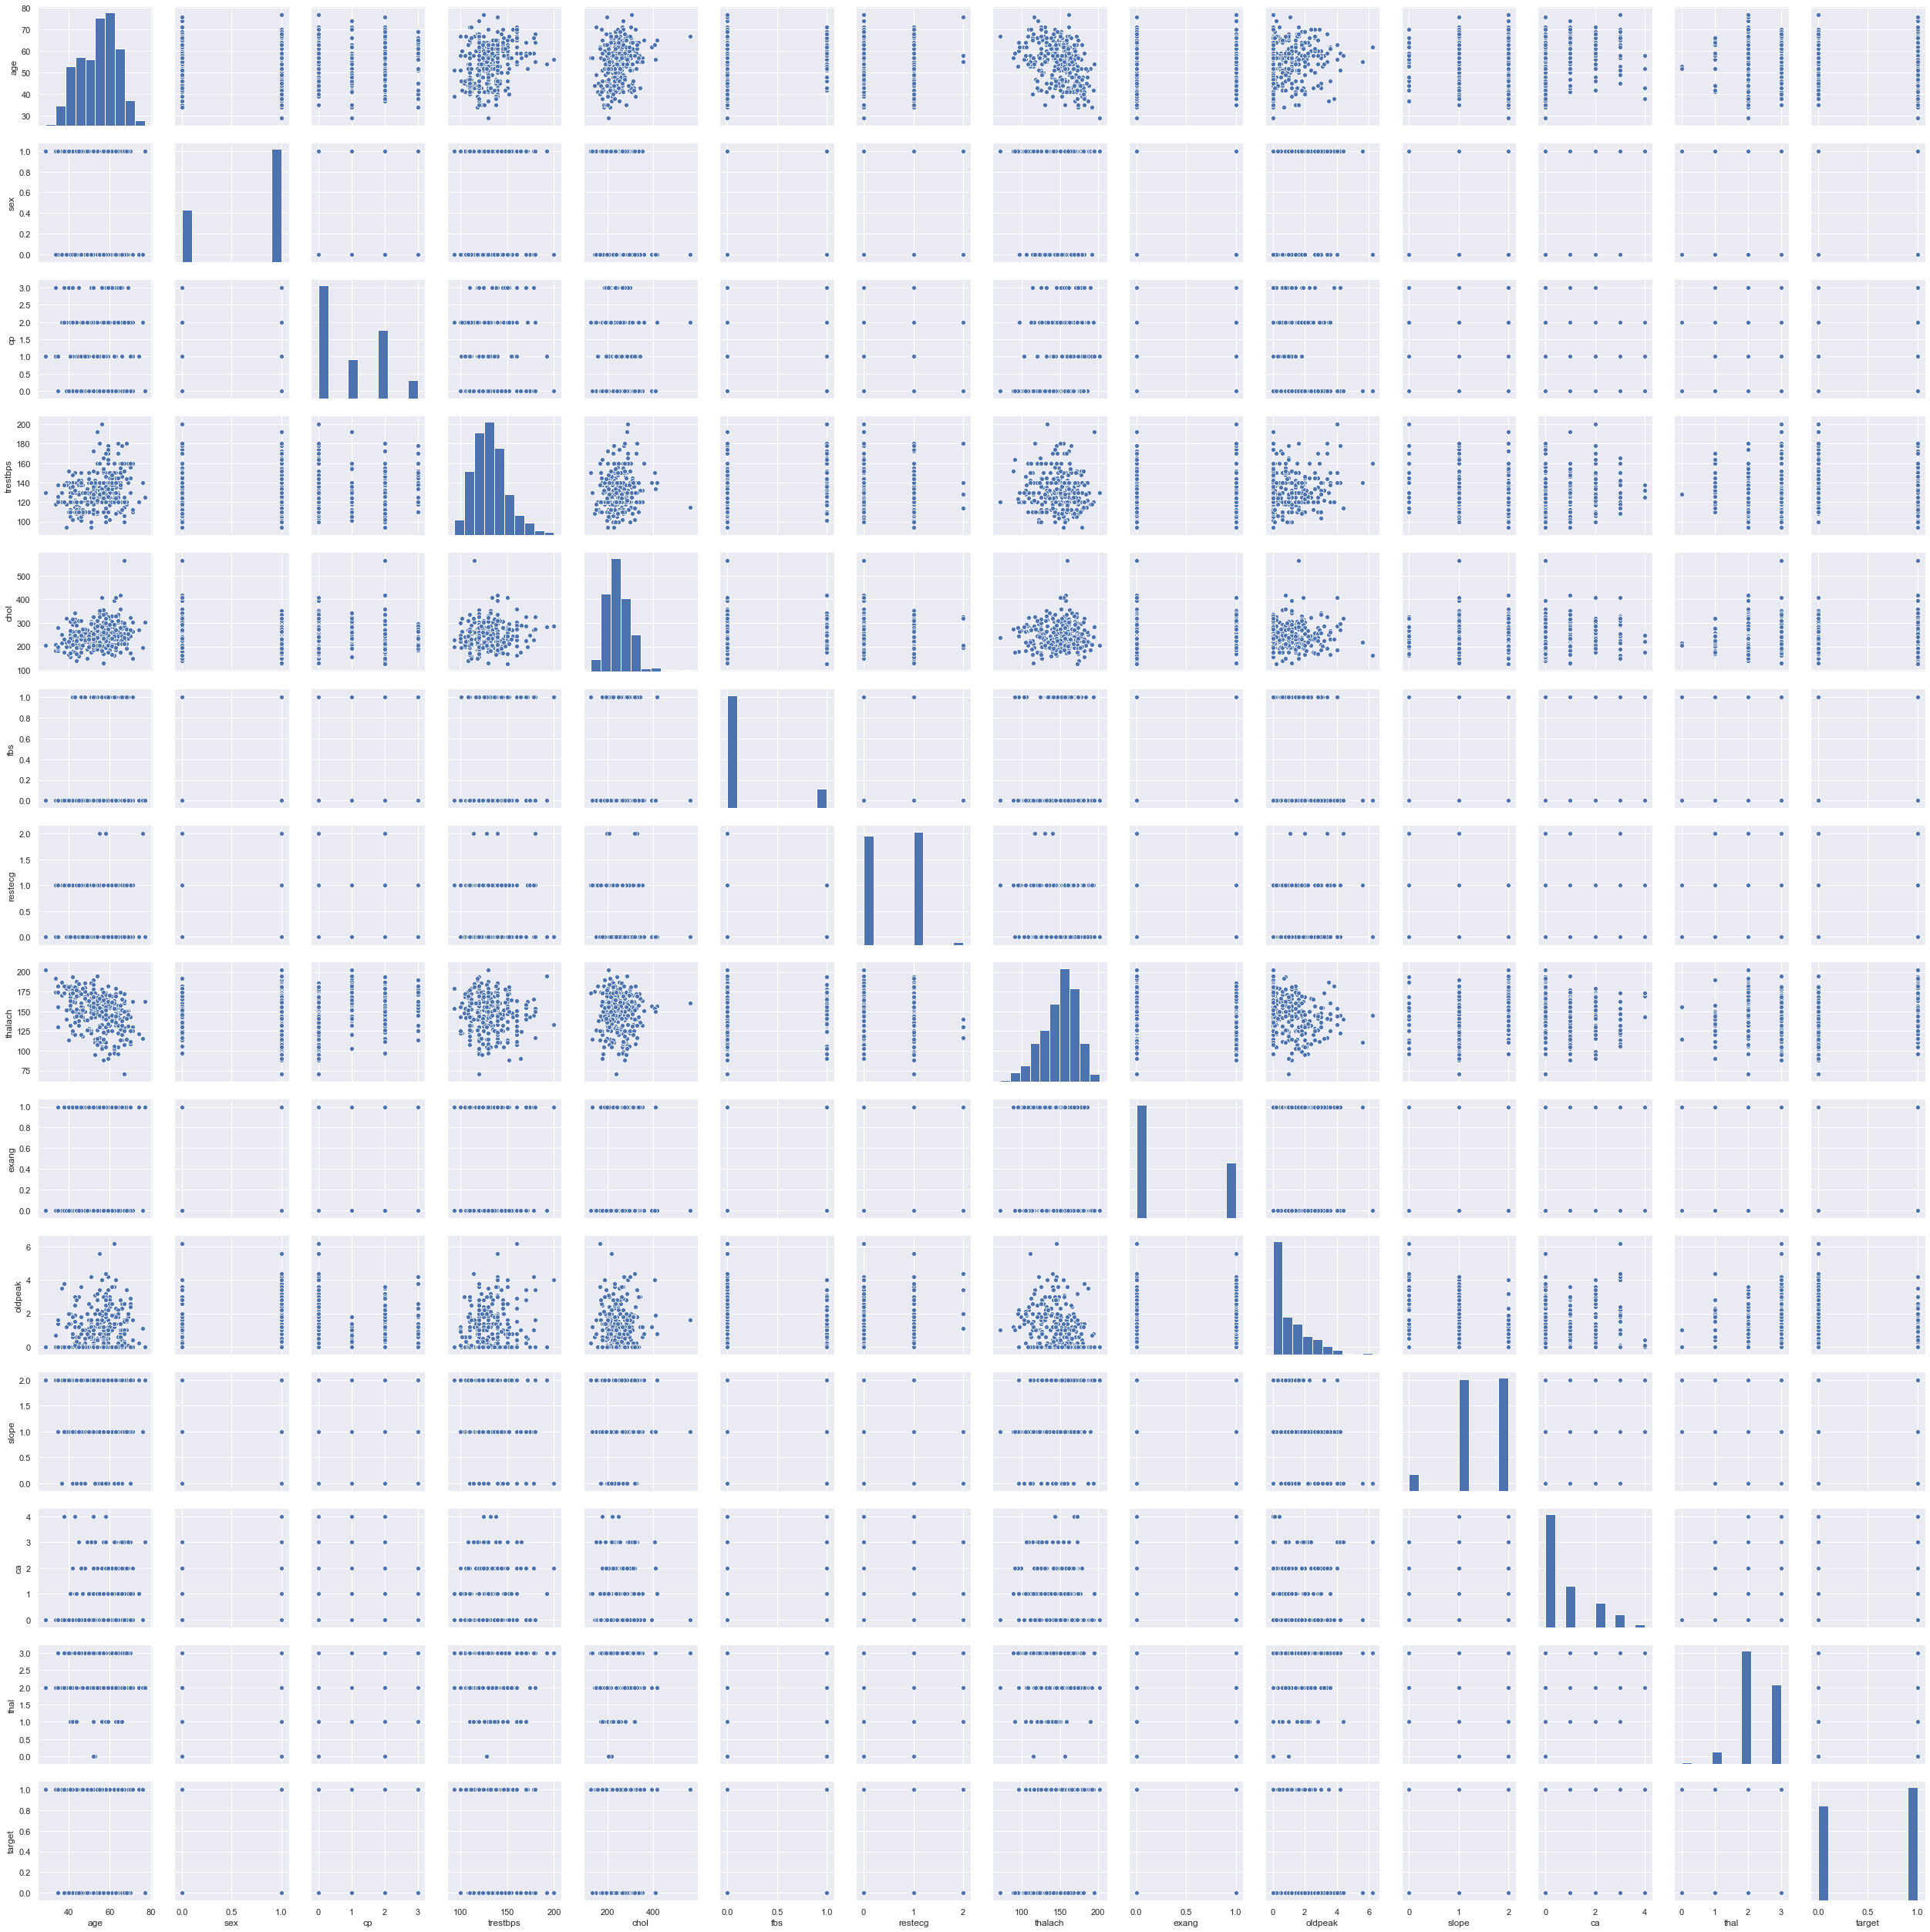

In [22]:
sns.set()
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

## train test split

In [23]:
dependent_all=df_train['target']
independent_all=df_train.drop(['target'],axis=1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(independent_all,dependent_all,test_size=0.3,random_state=100)

## Logistic regression

In [25]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.8584905660377359


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_prediction)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_train, log_prediction))
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_train, log_prediction))

AUC on train using Logistic Regression : 0.8496376811594203
Average precision-recall score: 0.82
recall_score on train set : 0.9166666666666666
F1_sccore on train set : 0.8799999999999999


In [28]:
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.8681318681318682


In [29]:
confusion_matrix(y_test, log_prediction)
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic Regression :",metrics.auc(fpr, tpr))
average_precision = average_precision_score(y_test, log_prediction)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, log_prediction))
print('F1_sccore on test set :',f1_score(y_test, log_prediction))

AUC on test using Logistic Regression : 0.868840579710145
Average precision-recall score: 0.80
recall_score on test set : 0.9333333333333333
F1_sccore on test set : 0.8749999999999999


## Kfold cross validation

In [31]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72727273 0.77272727 0.85714286 0.85714286 0.71428571 0.76190476
 0.80952381 0.9047619  0.95238095 0.95238095]
Mean: 0.830952380952381
Standard Deviation: 0.08323882874308594


## Xgboost 

In [42]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.001)

In [43]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.8490566037735849


In [45]:
from sklearn import metrics
print(confusion_matrix(y_train, XGB_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBClassifiers:",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_train, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on train set :',recall_score(y_train, XGB_prediction))
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))


[[ 70  22]
 [ 10 110]]
AUC on train using XGBClassifiers: 0.8387681159420289
Average precision-recall score: 0.81
recall_score on train set : 0.9166666666666666
F1_sccore on train set : 0.8730158730158729


In [46]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.8241758241758241


In [47]:
from sklearn import metrics
print(confusion_matrix(y_test, XGB_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBClassifiers:",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, XGB_prediction))
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))


[[35 11]
 [ 5 40]]
AUC on test using XGBClassifiers: 0.8248792270531401
Average precision-recall score: 0.75
recall_score on test set : 0.8888888888888888
F1_sccore on test set : 0.8333333333333334


## Kfold cross validation

In [48]:
xg = xgb.XGBClassifier()
scores = cross_val_score(xg, x_test, y_test, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84210526 0.83333333 0.83333333 0.88888889 0.83333333]
Mean: 0.8461988304093568
Standard Deviation: 0.021613705979621405


## Random forest

In [56]:
rfc2=RandomForestClassifier(n_estimators=100)
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 1.0


In [58]:
from sklearn import metrics
print(confusion_matrix(y_train, rfc_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on train set :',recall_score(y_train, rfc_prediction))
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))


[[ 92   0]
 [  0 120]]
AUC on train using RandomForest : 1.0
Average precision-recall score: 1.00
recall_score on train set : 1.0
F1_sccore on train set : 1.0


In [59]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.8681318681318682


In [60]:

print(confusion_matrix(y_test, rfc_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, rfc_prediction))
print('F1_sccore on test set :',f1_score(y_test, rfc_prediction))


[[37  9]
 [ 3 42]]
AUC on test using RandomForest : 0.868840579710145
Average precision-recall score: 0.80
recall_score on test set : 0.9333333333333333
F1_sccore on test set : 0.8749999999999999


## Kfold cross validation 

In [62]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.68181818 0.77272727 0.9047619  0.80952381 0.80952381 0.9047619
 0.9047619  0.85714286 0.85714286 0.80952381]
Mean: 0.8311688311688311
Standard Deviation: 0.06687576137421128


# GridSearchCV [RandomForestClassifier]

In [63]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto','sqrt','log2'],'max_depth':[None, 10, 5, 3, 1],
              'min_samples_leaf':[1, 5, 10, 20, 50]}
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=10, scoring='accuracy')
grid_clf.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [64]:
grid_clf.best_params_


{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5}

In [65]:
clf = RandomForestClassifier().fit(x_train, y_train)

In [66]:
y_pred = clf.predict(x_test)

In [67]:
print('Training Accuracy :: ', accuracy_score(y_train, clf.predict(x_train)))
print('Test Accuracy :: ', accuracy_score(y_test, y_pred))

Training Accuracy ::  0.9858490566037735
Test Accuracy ::  0.8241758241758241


## Conclusion